# 3-3 특성 공학과 규제

## 다중 회귀(multiple regression)
여러 개의 특성을 사용한 선형 회귀(평면)

## 특성 공학(feature enginerring)
각 특성을 서로 곱해서 또 다른 특성을 만드는 것

# 데이터 준비

In [1]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 훈련 세트 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기(transformer)
특성을 만들거나 전처리하기 위한 클래스

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

# 훈련(fit)을 해야 변환(transform)이 가능

[[1. 2. 3. 4. 6. 9.]]


fit() 메서드는 새롭게 만들 특성 조합을 찾고 transform() 메서드는 실제로 데이터를 변환합니다.
PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 서로 곱한 항을 추가합니다.  
1은 절편에 곱해져 있는 계수

무게 = a * 길이 + b * 높이 + c * 두께 + d * 1
특성 : (길이, 높이, 두께, 1)

In [6]:
poly = PolynomialFeatures(include_bias=False)  # include_bias=False : 1을 제거, 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시하므로 꼭 지정할 필요X
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))


[[2. 3. 4. 6. 9.]]


In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [8]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [9]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [11]:
print(lr.score(train_poly, train_target))  # 훈련 세트

0.9903183436982125


In [12]:
print(lr.score(test_poly, test_target))  # 테스트 세트

0.9714559911594155


In [13]:
# 5제곱까지 특성을 만들어 보자
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [14]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [15]:
print(lr.score(test_poly, test_target))  # 음수가 나오는 문제 : 과대적합

-144.40744532797535


## 궁금한 점 : 위의 결정계수값이 음수가 나오는데 결정계수는 제곱된 값들로 된 식으로 계산이 되는데 어떻게 음수가 나오는 걸까...?

## 규제(regularization)
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것. 즉 모델이 훈련 세트에 과대적합되지 않도록 하는 것이다. 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 일

In [16]:
# 특성의 스케일 정규화 후 규제하기
from sklearn.preprocessing import StandardScaler  # StandardScaler 객체의 mean_, scale_ 속성에 평균과 표준편차가 저장됨
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부릅니다. 릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고, 라쏘는 계수의 절댓값을 기준으로 규제를 적용합니다. 일반적으로 릿지를 선호.  
두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있음

## 릿지 회귀

In [17]:
# 릿지 모델 훈련
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [18]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


alpha 매개변수로 규제의 강도를 조절할 수 있다.  
alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도.  
alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 큼.

alpha 값은 릿지 모델이 학습하는 값이 아니라 사전에 우리가 지정해야 하는 값이다.  
머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 하이퍼파라미터(hyperparameter)라고 한다.

적절할 alpha 값을 찾는 한 가지 방법은 alpha 값에 따라 결정계수 값의 그래프를 그려 보는 것.  
훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨

In [19]:
import matplotlib.pyplot as plt
train_score =[]
test_score = []

In [20]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

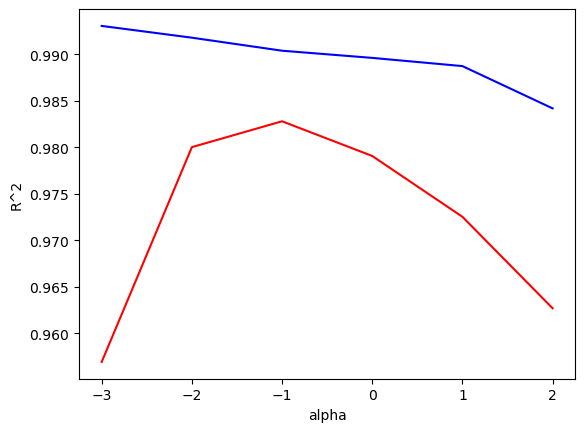

In [21]:
# alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 최적의 alpha는 0.1 !!

In [22]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


## 라쏘 회귀

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [24]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [25]:
# 최적의 alpha 찾기
train_score =[]
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\leeji\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\leeji\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


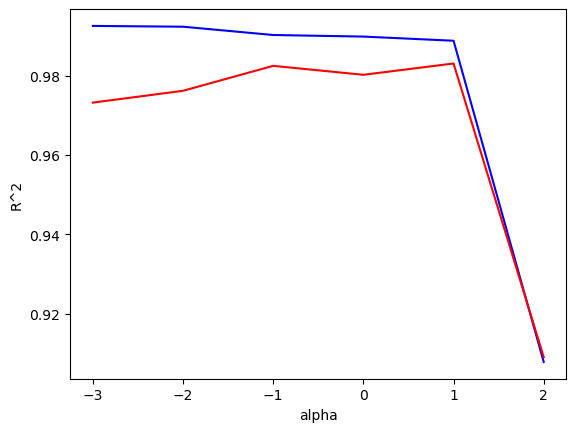

In [26]:
plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color='red')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 최적의 alpha 는 1 !!

In [27]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [28]:
# 계수가 0인 것의 개수 구하기
print(np.sum(lasso.coef_ == 0))  # np.sum() : 배열을 모두 더한 값을 반환, True를 1로, False를 0으로 인식하여 덧셈

40
